In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
import statsmodels.api as sm


In [2]:
df = pd.read_csv("ElectricCarData_Norm.csv")

In [3]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [5]:
df['PriceIndian'] = df['PriceEuro']*0.08320
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceIndian
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,2745.3504


Description and information of the dataset

In [6]:
df.describe()

,Seats,PriceEuro,PriceIndian
count,103.000000,103.000000,103.000000
mean,4.883495,55811.563107,4643.522050
std,0.795834,34134.665280,2840.004151
min,2.000000,20129.000000,1674.732800
25%,5.000000,34429.500000,2864.534400
50%,5.000000,45000.000000,3744.000000
75%,5.000000,65000.000000,5408.000000
max,7.000000,215000.000000,17888.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Model        103 non-null    object 
 2   Accel        103 non-null    object 
 3   TopSpeed     103 non-null    object 
 4   Range        103 non-null    object 
 5   Efficiency   103 non-null    object 
 6   FastCharge   103 non-null    object 
 7   RapidCharge  103 non-null    object 
 8   PowerTrain   103 non-null    object 
 9   PlugType     103 non-null    object 
 10  BodyStyle    103 non-null    object 
 11  Segment      103 non-null    object 
 12  Seats        103 non-null    int64  
 13  PriceEuro    103 non-null    int64  
 14  PriceIndian  103 non-null    float64
dtypes: float64(1), int64(2), object(12)
memory usage: 12.2+ KB


Finding the null values

In [8]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
PriceIndian    0
dtype: int64

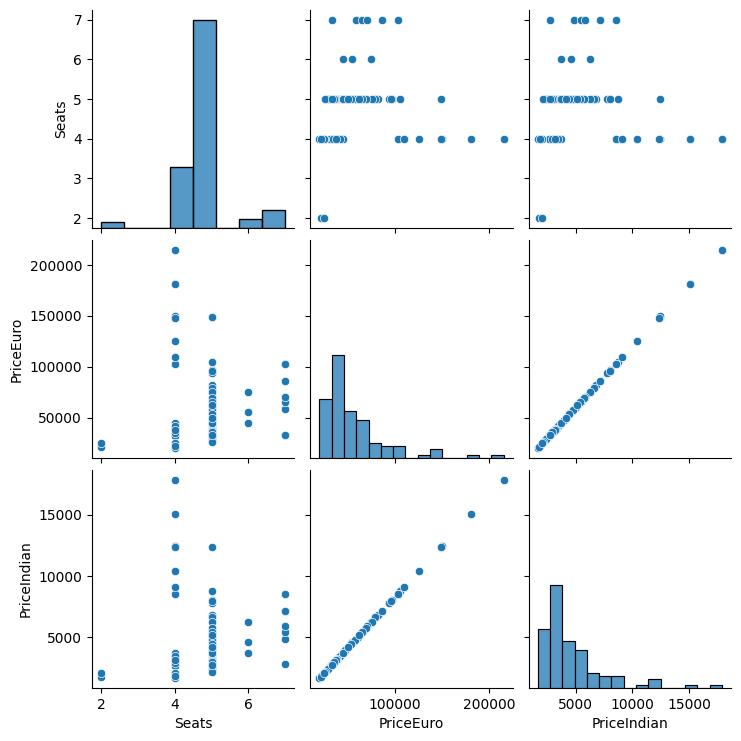

In [9]:
sns.pairplot(df)

<ipython-input-10-ee0b69a6e32b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


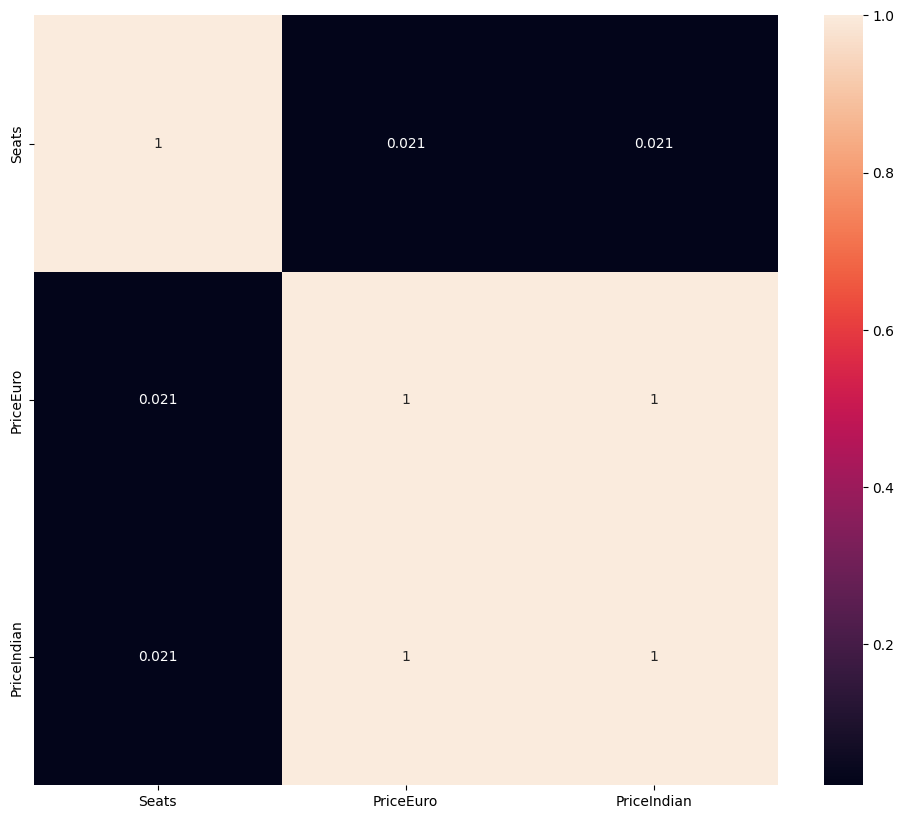

In [10]:
ax= plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [11]:
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Accel'] = df['Accel'].astype('category')
df['TopSpeed'] = df['TopSpeed'].astype('category')
df['Range'] = df['Range'].astype('category')
df['Efficiency'] = df['Efficiency'].astype('category')
df['FastCharge'] = df['FastCharge'].astype('category')
df['RapidCharge'] = df['RapidCharge'].astype('category')
df['PowerTrain'] = df['PowerTrain'].astype('category')
df['PlugType'] = df['PlugType'].astype('category')
df['BodyStyle'] = df['BodyStyle'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Seats'] = df['Seats'].astype('category')
df['PriceEuro'] = df['PriceEuro'].astype('category')
df['PriceIndian'] = df['PriceIndian'].astype('category')

In [12]:
print(df.dtypes)
print("\n\n")
print(df.head(3))

Brand          category
Model          category
Accel          category
TopSpeed       category
Range          category
Efficiency     category
FastCharge     category
RapidCharge    category
PowerTrain     category
PlugType       category
BodyStyle      category
Segment        category
Seats          category
PriceEuro      category
PriceIndian    category
dtype: object



         Brand                          Model     Accel  TopSpeed   Range  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1  Volkswagen                       ID.3 Pure  10.0 sec  160 km/h  270 km   
2    Polestar                               2   4.7 sec  210 km/h  400 km   

  Efficiency FastCharge              RapidCharge        PowerTrain  \
0  161 Wh/km   940 km/h  Rapid charging possible   All Wheel Drive   
1  167 Wh/km   250 km/h  Rapid charging possible  Rear Wheel Drive   
2  181 Wh/km   620 km/h  Rapid charging possible   All Wheel Drive   

     PlugType  BodyStyle Segment 

In [14]:
df['Brand'] = df['Brand'].cat.codes
df['Model'] = df['Model'].cat.codes
df['Accel'] = df['Accel'].cat.codes
df['TopSpeed'] = df['TopSpeed'].cat.codes
df['Range'] = df['Range'].cat.codes
df['Efficiency'] = df['Efficiency'].cat.codes
df['FastCharge'] = df['FastCharge'].cat.codes
df['RapidCharge'] = df['RapidCharge'].cat.codes
df['PowerTrain'] = df['PowerTrain'].cat.codes
df['PlugType'] = df['PlugType'].cat.codes
df['BodyStyle'] = df['BodyStyle'].cat.codes
df['Segment'] = df['Segment'].cat.codes
df['Seats'] = df['Seats'].cat.codes
df['PriceEuro'] = df['PriceEuro'].cat.codes
df['PriceIndian'] = df['PriceIndian'].cat.codes

In [15]:
df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceIndian
0,30,46,20,18,41,5,50,1,0,2,7,3,2,52,52
1,31,33,0,9,14,9,7,1,2,2,1,2,2,11,11
2,23,0,21,15,34,21,36,1,0,2,2,3,2,53,53
3,2,101,35,12,27,32,32,1,2,2,6,3,2,64,64
4,9,78,50,5,3,10,2,1,2,2,1,1,1,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,6,39,9,23,25,21,1,1,2,1,2,2,43,43
99,1,94,19,15,24,49,30,1,0,2,6,4,2,75,75
100,20,8,29,14,22,27,21,1,0,2,1,2,2,47,47
101,20,10,25,14,30,44,22,1,0,2,1,2,2,61,61


In [17]:
df.describe()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceIndian
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,18.058252,50.864078,29.048544,10.495146,24.815534,22.009709,20.601942,0.951456,0.844660,1.922330,4.077670,2.621359,1.902913,42.194175,42.194175
std,10.546652,29.674393,16.044899,6.043752,12.991511,14.074379,14.110447,0.215963,0.789108,0.388292,2.515401,1.698422,0.734507,23.987766,23.987766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.500000,25.500000,16.500000,6.000000,13.000000,10.000000,8.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,22.500000,22.500000
50%,20.000000,51.000000,32.000000,9.000000,26.000000,20.000000,21.000000,1.000000,1.000000,2.000000,6.000000,2.000000,2.000000,43.000000,43.000000
75%,27.500000,76.500000,42.000000,14.000000,35.000000,31.500000,31.500000,1.000000,1.000000,2.000000,6.000000,4.000000,2.000000,61.000000,61.000000
max,32.000000,101.000000,54.000000,24.000000,49.000000,53.000000,50.000000,1.000000,2.000000,3.000000,8.000000,7.000000,4.000000,86.000000,86.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Brand        103 non-null    int8 
 1   Model        103 non-null    int8 
 2   Accel        103 non-null    int8 
 3   TopSpeed     103 non-null    int8 
 4   Range        103 non-null    int8 
 5   Efficiency   103 non-null    int8 
 6   FastCharge   103 non-null    int8 
 7   RapidCharge  103 non-null    int8 
 8   PowerTrain   103 non-null    int8 
 9   PlugType     103 non-null    int8 
 10  BodyStyle    103 non-null    int8 
 11  Segment      103 non-null    int8 
 12  Seats        103 non-null    int8 
 13  PriceEuro    103 non-null    int8 
 14  PriceIndian  103 non-null    int8 
dtypes: int8(15)
memory usage: 1.6 KB


In [19]:
fig = px.bar(df,x='Brand',y = 'TopSpeed',color = 'Brand',title = 'Top Speed comparision for different cars',labels = {'x':'Car Brands','y':'TopSpeed(km/h)'})
pio.show(fig)

In [20]:
fig = px.bar(df,x='Accel',y = 'Brand',color = 'Brand',title = 'Accelaration Comparision graph',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)
     

In [21]:
fig = px.pie(df,names = 'Brand',values = 'PriceIndian')
pio.show(fig)

In [22]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
pio.show(fig)

In [23]:
fig = px.box(df,x='RapidCharge',y = 'PriceIndian',color = 'RapidCharge',points='all')
pio.show(fig)

In [24]:
fig = px.scatter(df,x = 'Brand',y = 'Range',size='Seats',color = 'Brand',hover_data=['RapidCharge','PriceIndian'])
pio.show(fig)

Pair plotting for the dataset

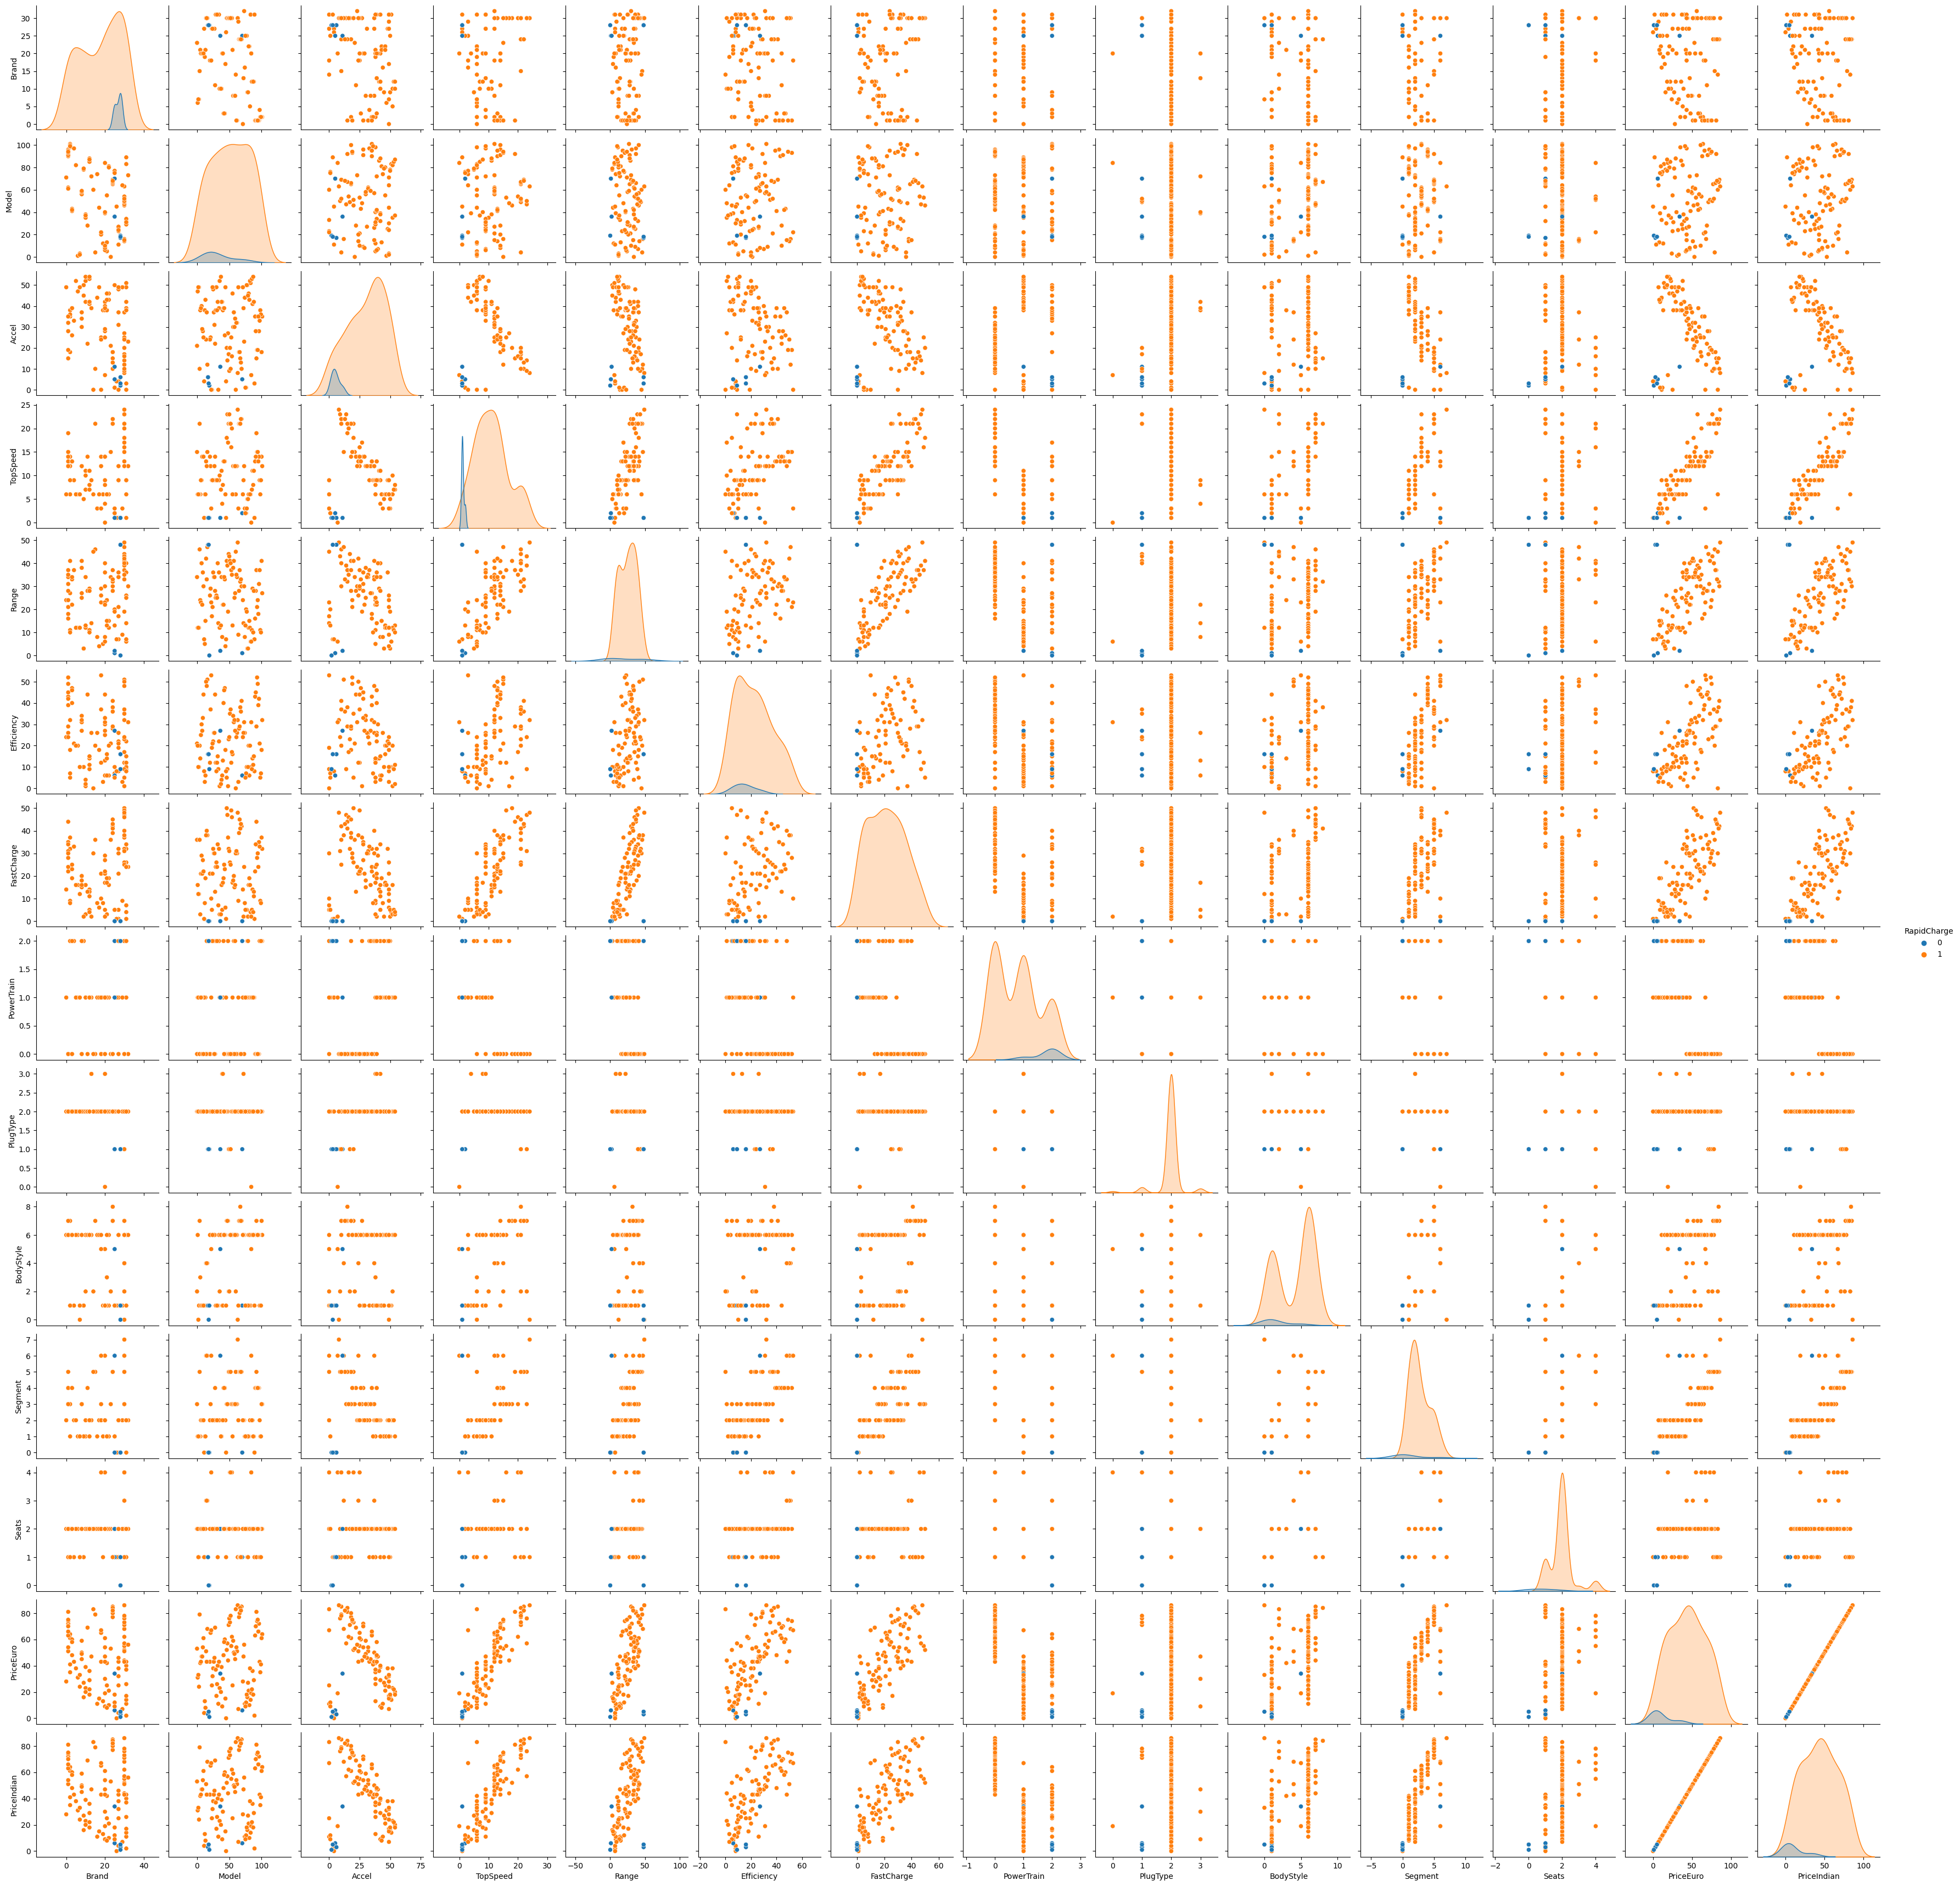

In [25]:
sns.pairplot(df,hue='RapidCharge')

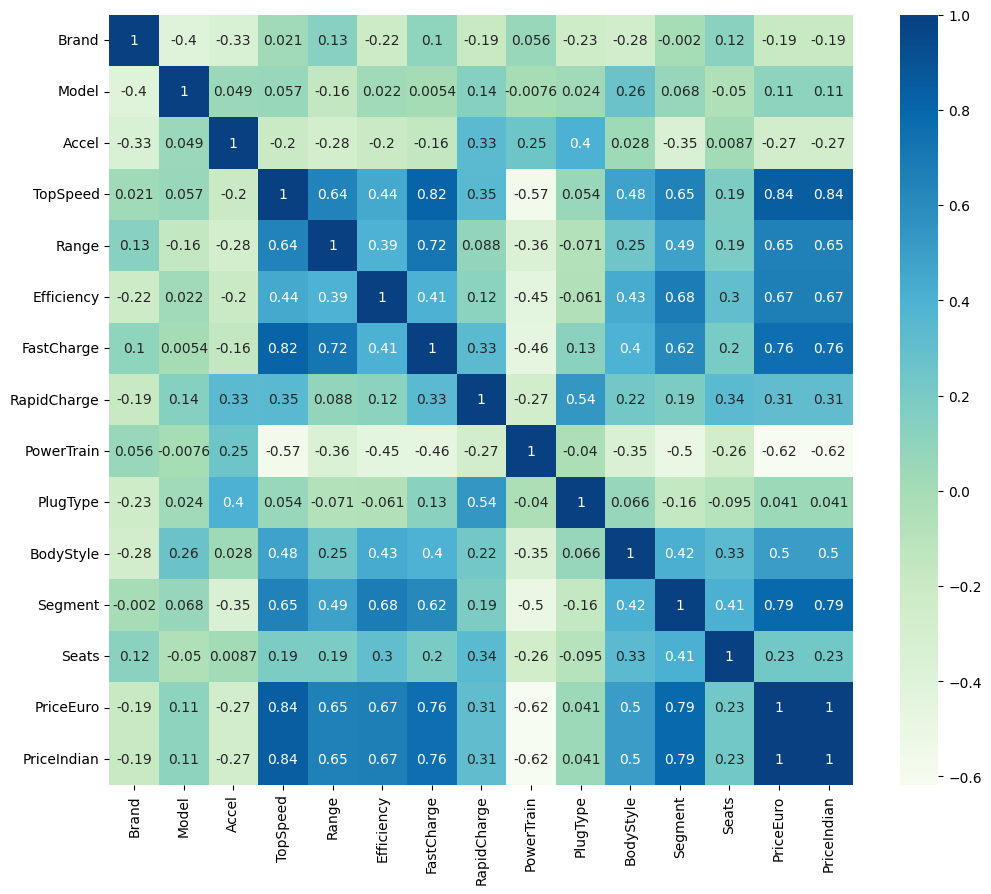

In [26]:
ax= plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True, cmap="GnBu")
plt.show()

In [27]:
df.corr()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceIndian
Brand,1.000000,-0.401572,-0.333033,0.021076,0.131307,-0.221659,0.100688,-0.188137,0.056464,-0.231104,-0.275860,-0.002040,0.122233,-0.190202,-0.190202
Model,-0.401572,1.000000,0.049247,0.057176,-0.160864,0.022491,0.005442,0.144293,-0.007609,0.023750,0.261255,0.068414,-0.049640,0.111227,0.111227
Accel,-0.333033,0.049247,1.000000,-0.195274,-0.284460,-0.196452,-0.161002,0.334548,0.248387,0.400314,0.028084,-0.347570,0.008723,-0.270289,-0.270289
TopSpeed,0.021076,0.057176,-0.195274,1.000000,0.644094,0.444486,0.817411,0.349092,-0.567529,0.054147,0.477244,0.650718,0.189824,0.843350,0.843350
Range,0.131307,-0.160864,-0.284460,0.644094,1.000000,0.394907,0.717471,0.087629,-0.361443,-0.070890,0.246149,0.485554,0.194340,0.654314,0.654314
Efficiency,-0.221659,0.022491,-0.196452,0.444486,0.394907,1.000000,0.405366,0.116273,-0.447413,-0.060855,0.433367,0.679746,0.302620,0.665857,0.665857
FastCharge,0.100688,0.005442,-0.161002,0.817411,0.717471,0.405366,1.000000,0.331404,-0.458178,0.126715,0.397805,0.616686,0.201503,0.762814,0.762814
RapidCharge,-0.188137,0.144293,0.334548,0.349092,0.087629,0.116273,0.331404,1.000000,-0.274797,0.539160,0.223577,0.189954,0.340828,0.306526,0.306526
PowerTrain,0.056464,-0.007609,0.248387,-0.567529,-0.361443,-0.447413,-0.458178,-0.274797,1.000000,-0.039763,-0.349484,-0.497850,-0.263083,-0.617321,-0.617321
PlugType,-0.231104,0.023750,0.400314,0.054147,-0.070890,-0.060855,0.126715,0.539160,-0.039763,1.000000,0.066463,-0.163959,-0.095449,0.040580,0.040580


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

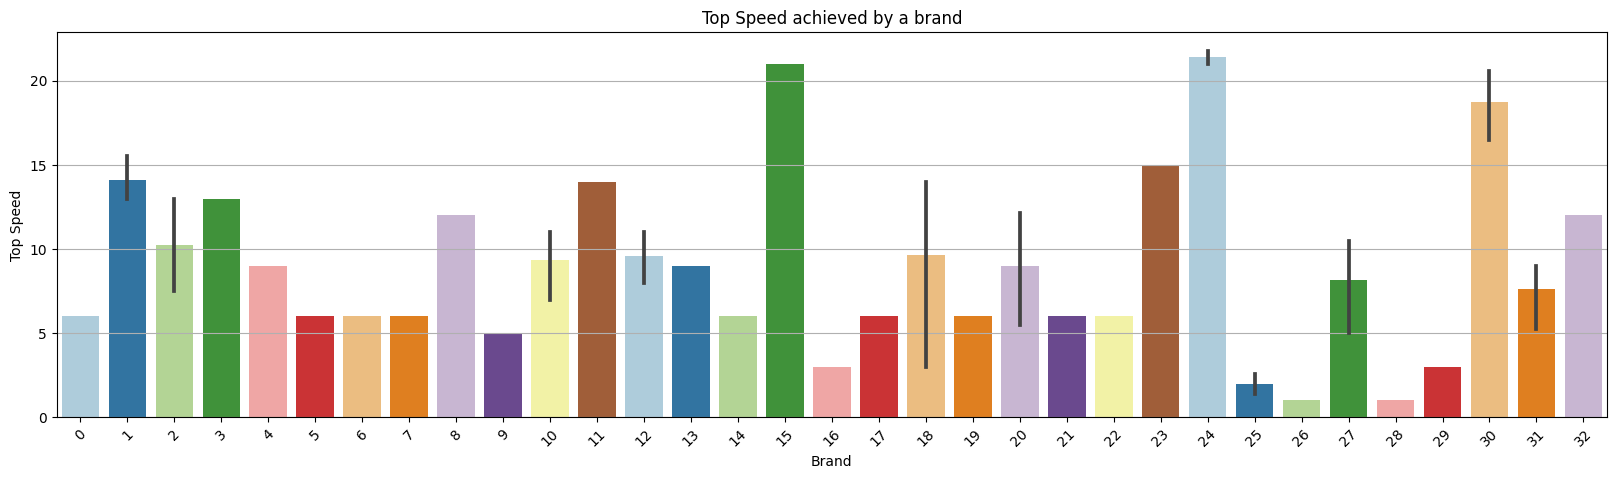

In [28]:
a=np.arange(1,104)
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

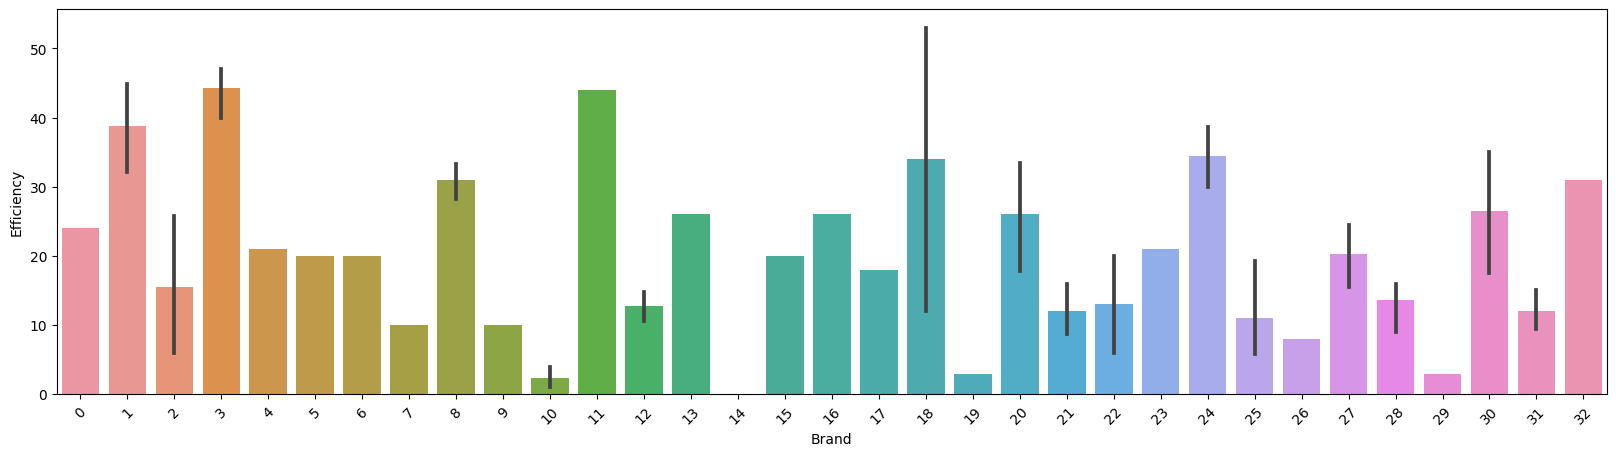

In [29]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['Brand'] , y=df['Efficiency'])
plt.xticks(rotation=45)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

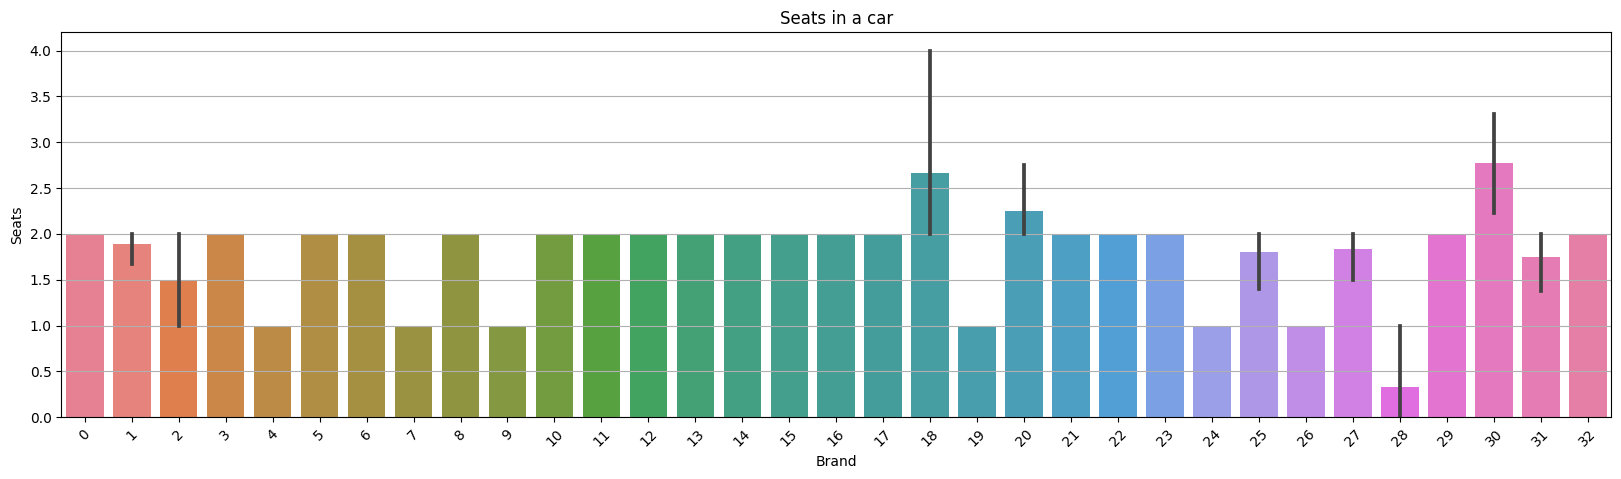

In [30]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Comparision plot of PriceIndian and PriceEuro wrt Brand

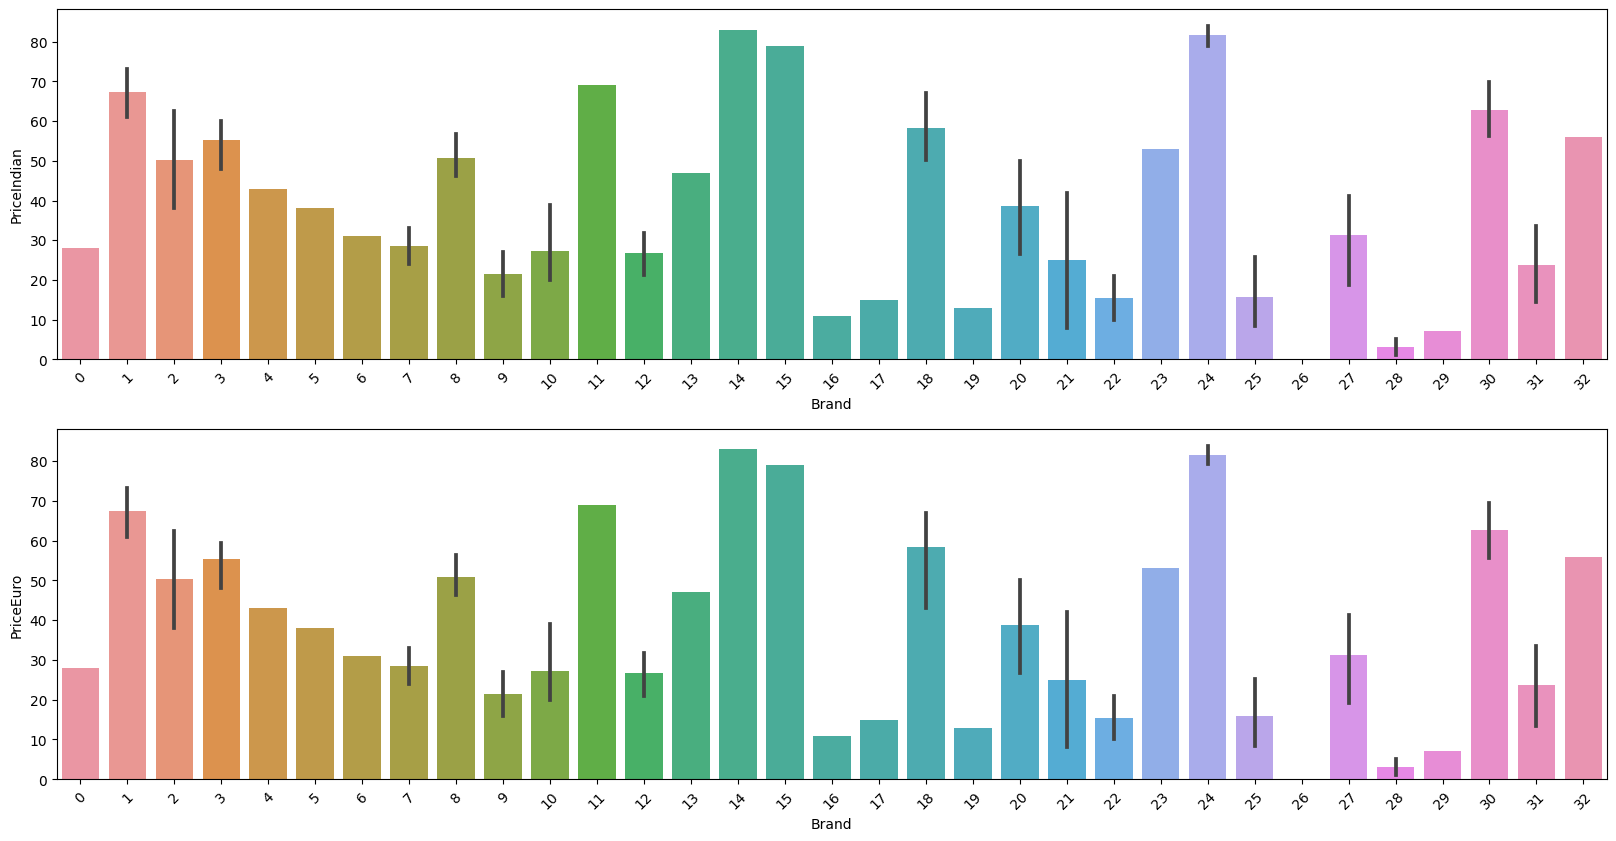

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(x='Brand' , y='PriceIndian', data=df)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x='Brand' , y='PriceEuro', data=df)
plt.xticks(rotation=45)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

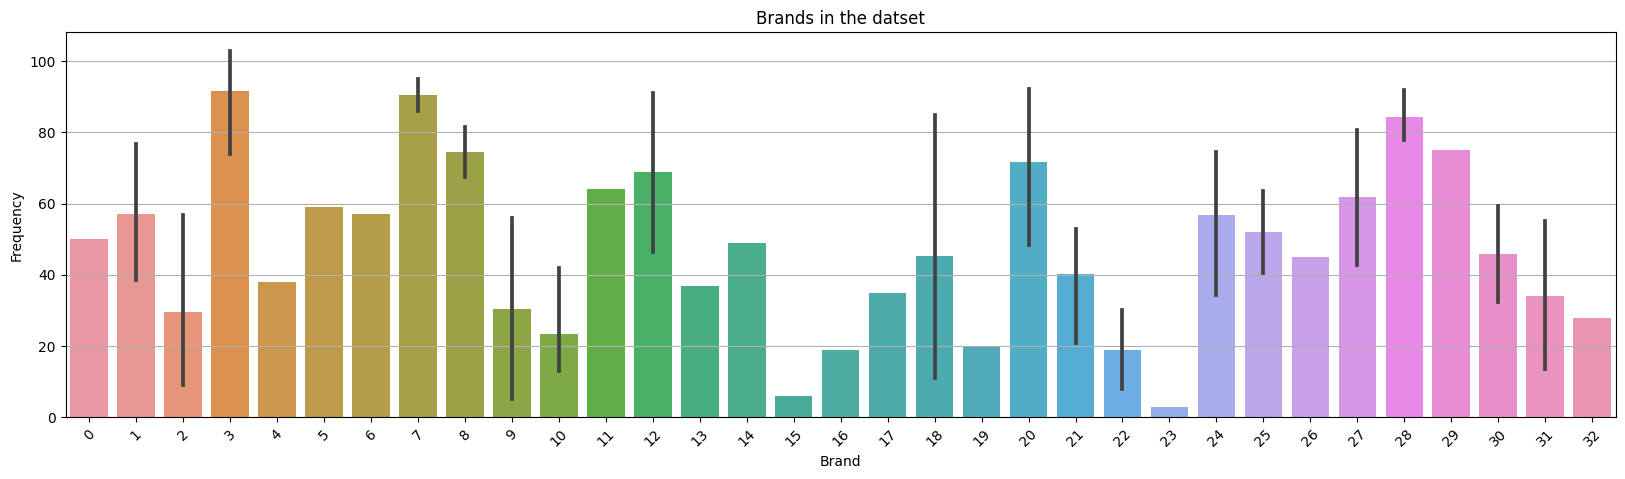

In [32]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Plug Type')

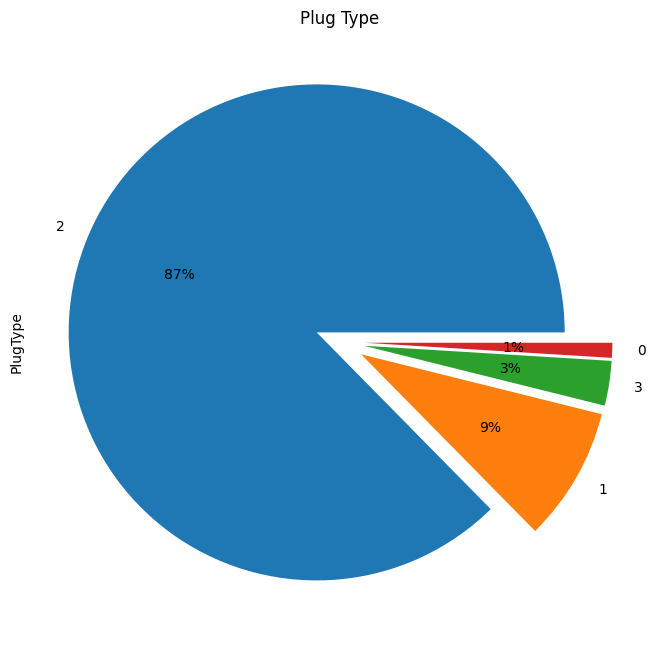

In [33]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Text(0.5, 1.0, 'Segment')

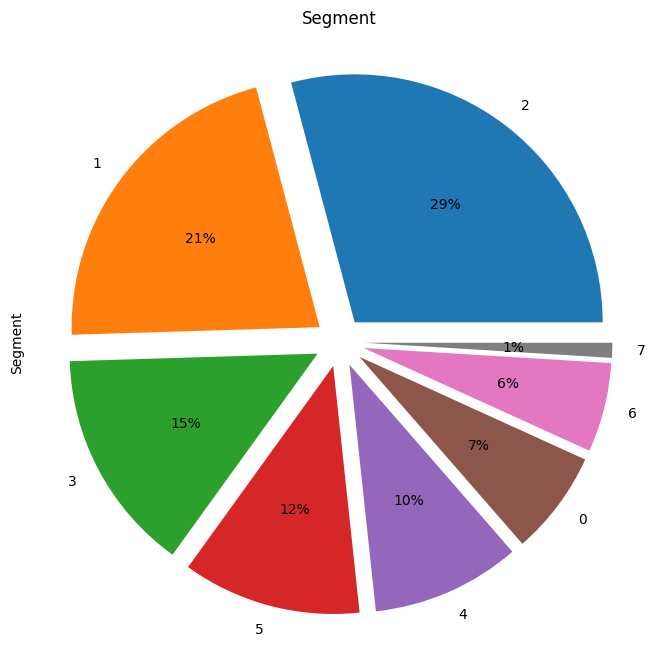

In [34]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Text(0.5, 1.0, 'Seats')

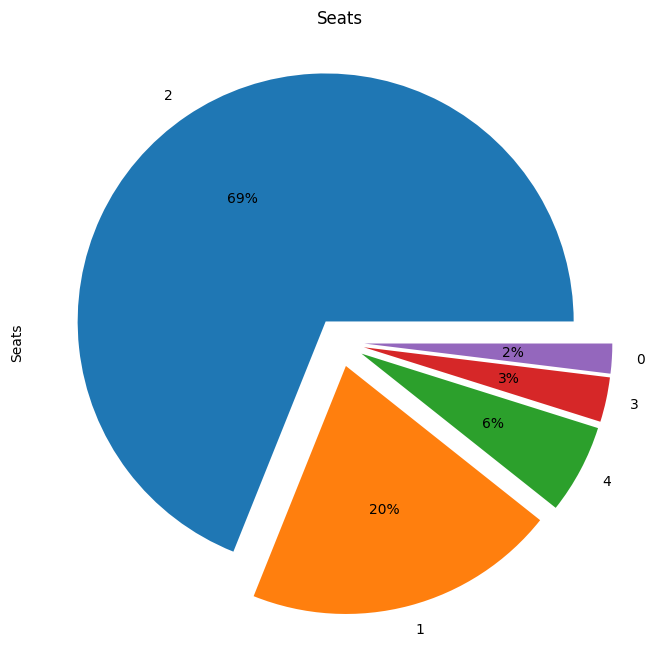

In [35]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

## Regression 

Defining x and y values 

In [36]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['Accel','Range','TopSpeed','Efficiency', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']
     

Finding out the linear regression using OLS method and fitting the model 

In [37]:
x= sm.add_constant(x)
results = sm.OLS(y,x)
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     83.24
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           7.87e-36
Time:                        05:17:17   Log-Likelihood:                -378.95
No. Observations:                 103   AIC:                             771.9
Df Residuals:                      96   BIC:                             790.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1439      5.837      0.025      0.980     -11.443      11.730
Accel          -0.1034      0.072     -1.428      0.156      -0.247       0.040
Range           0.2397      0.103      2.327      0.022       0.035       0.444
TopSpeed        2.0962      0.256      8.191      0.000       1.588       2.604
Efficiency      0.5398      0.082      6.573      0.000       0.377       0.703
RapidCharge     7.9747      5.544      1.438      0.154      -3.031      18.980
PowerTrain     -2.7981      1.621     -1.726      0.088      -6.016       0.420
==============================================================================
Omnibus:                       52.139   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.094
Skew:                           1.610   Prob(JB):                     5.41e-52
Kurtosis:                       9.682   Cond. No.                         361.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
r2=(r2_score(y_test,pred))
print(r2*100)     

77.2078495479516


Around 77% of dependant variables has been explained in independent variables

In [40]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int8)

In [41]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  1],
       [ 0, 20]])

### Using Clustering 

<Axes: xlabel='TopSpeed', ylabel='FastCharge'>

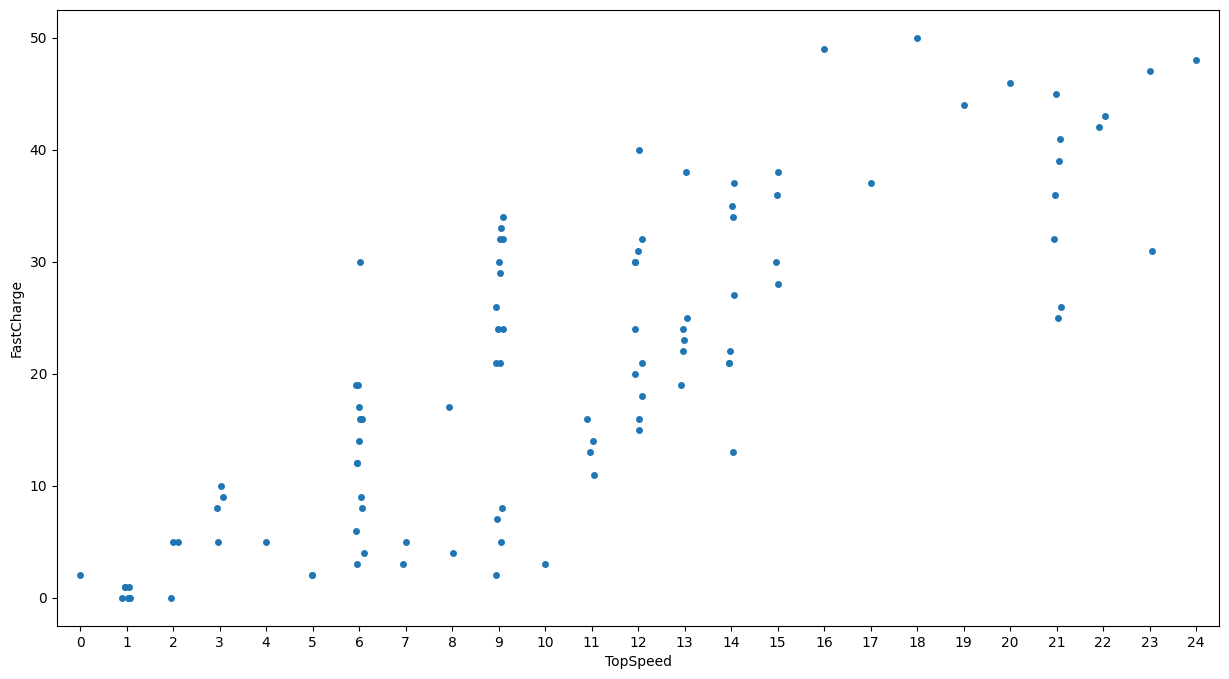

In [42]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed', y='FastCharge', data=df, jitter=True)

In [43]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter

In [44]:
features = ['Accel','TopSpeed','Efficiency','FastCharge', 'RapidCharge','Range', 'Seats', 'PriceIndian','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2     

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,-2.170730,0.288189,-1.318222,0.694648,1.641226,-0.711811,0.244965,-0.648947,-0.033603
1,1.883933,0.703480,0.517020,0.728385,1.262747,1.676493,0.165564,0.243003,-0.692880
2,-1.721282,0.237101,-0.297710,-0.040120,0.755474,-0.367315,-0.033625,-0.369275,-0.075209
3,-0.658644,-0.306108,-0.524285,0.816753,-1.244410,0.995057,0.491278,-0.081243,0.457597
4,3.198308,-0.902197,-0.842096,-0.647225,-0.524836,0.519931,0.244262,0.249580,-0.033017
...,...,...,...,...,...,...,...,...,...
98,0.152697,-0.595871,0.003145,0.018611,-0.458218,-0.020168,-0.023583,-0.113314,0.150971
99,-2.335488,0.344454,0.807842,-1.100591,-0.697733,0.454493,0.229012,-0.214787,0.088942
100,-0.819919,-0.222136,0.336084,-0.807138,0.265446,-0.331554,0.163442,0.065123,-0.289118
101,-1.766782,0.153253,0.716643,-0.835167,-0.604825,-0.019931,-0.308157,0.130109,-0.227721


In [45]:
df_new=data2.iloc[:,:9]
df_new.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,-2.170730,0.288189,-1.318222,0.694648,1.641226,-0.711811,0.244965,-0.648947,-0.033603
1,1.883933,0.703480,0.517020,0.728385,1.262747,1.676493,0.165564,0.243003,-0.692880
2,-1.721282,0.237101,-0.297710,-0.040120,0.755474,-0.367315,-0.033625,-0.369275,-0.075209


In [46]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_new.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,0.140383,-0.629022,-0.298195,-0.038978,-0.477808,-0.504315,0.073664,0.058222,0.052278
PC2,-0.430534,-0.008727,-0.264880,-0.037832,0.089213,0.025739,0.481880,0.419831,-0.570861
PC3,-0.321977,0.061427,0.404056,-0.230186,-0.710959,0.217748,-0.141612,-0.167575,-0.274405
PC4,-0.414701,-0.012995,-0.333653,0.213263,0.031973,0.005230,0.237926,-0.778310,0.087318
Pc5,-0.183206,-0.655961,-0.107597,-0.143249,0.270471,0.522891,-0.392928,0.003727,-0.055478
PC6,-0.367714,0.186925,-0.212253,0.498220,-0.071663,-0.257927,-0.644507,0.210521,-0.072117
PC7,-0.179152,-0.364114,0.671880,0.535908,0.146538,-0.130126,0.234609,0.041599,0.039078
PC8,-0.449821,0.048603,-0.050257,-0.139620,-0.144862,0.136774,0.171557,0.354873,0.760408
PC9,0.340697,0.012110,-0.236125,0.568461,-0.369468,0.567434,0.177334,0.120441,0.020870


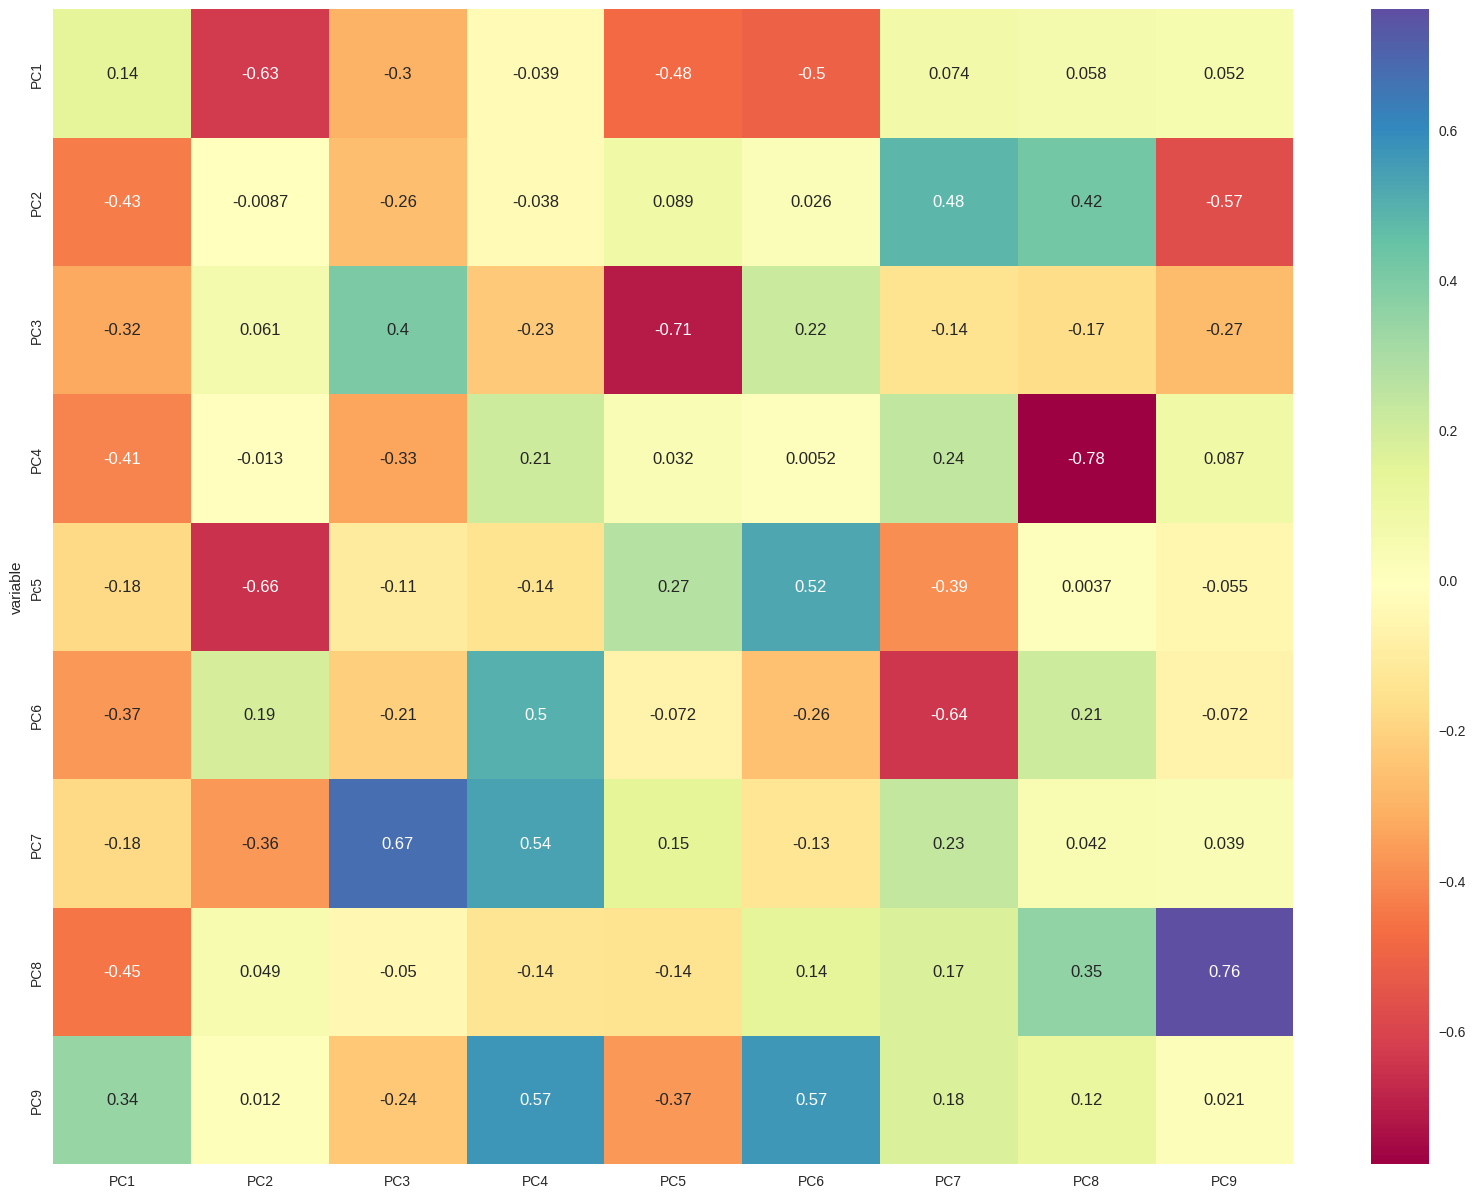

In [47]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

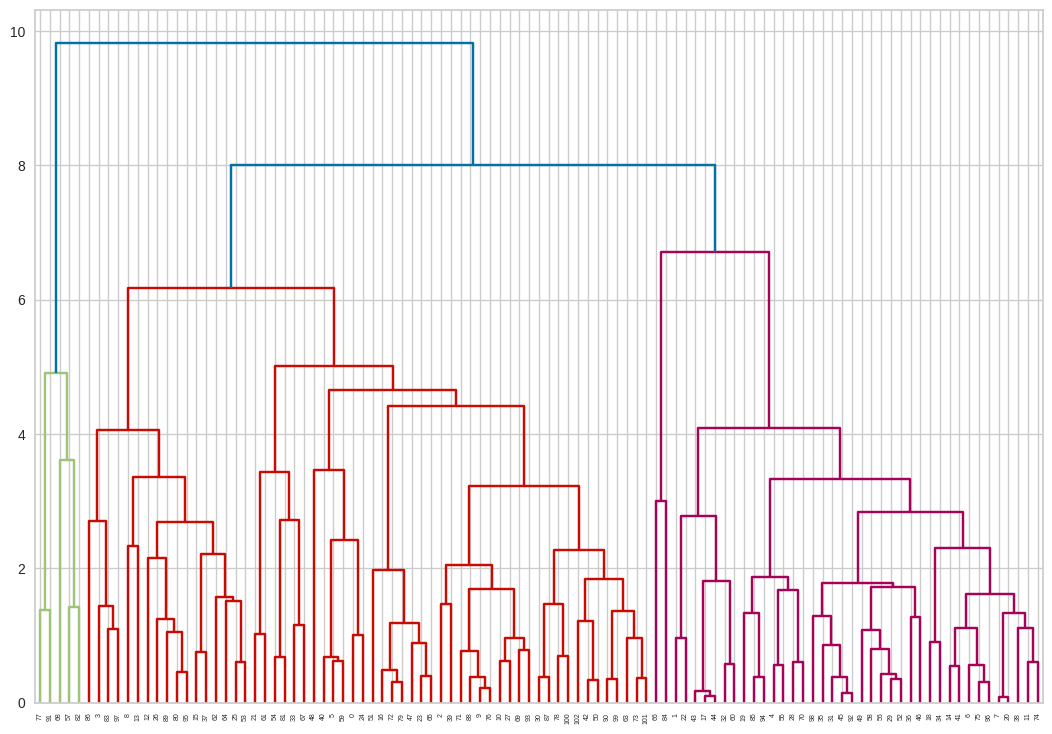

In [48]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

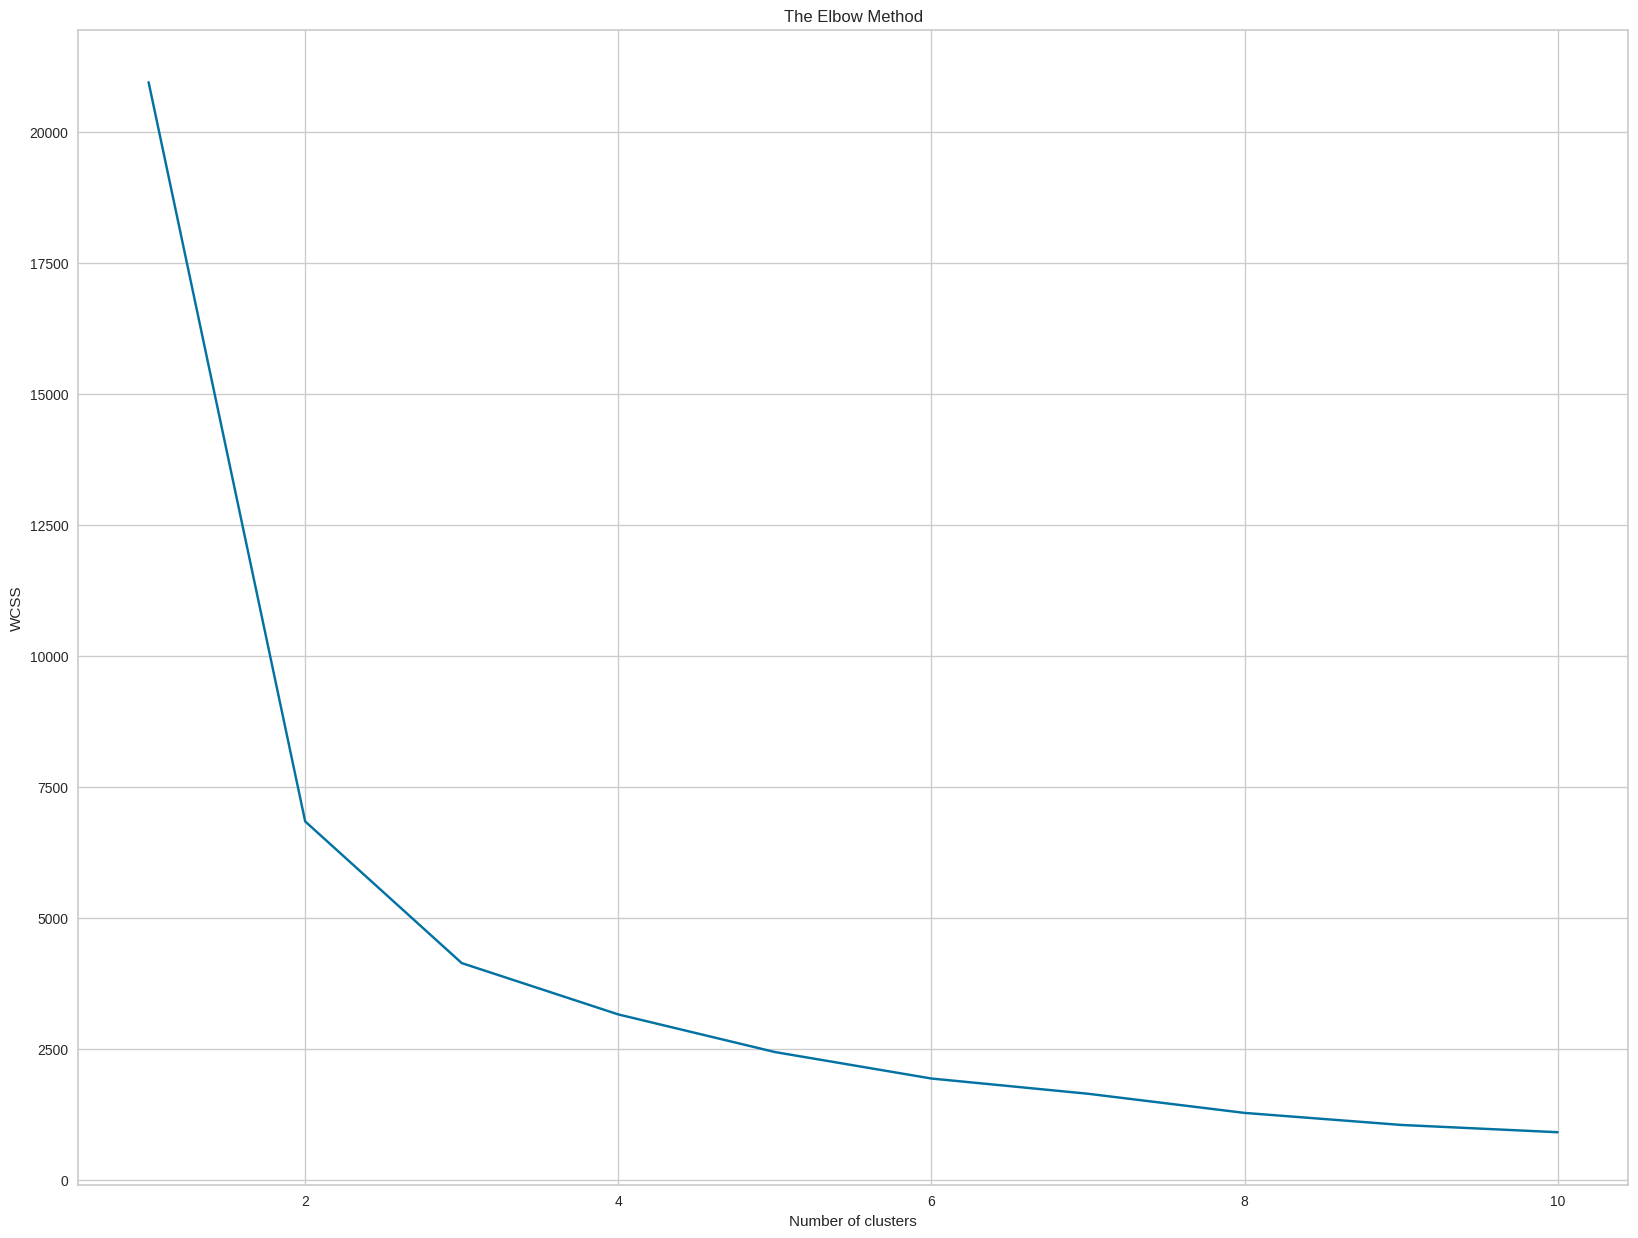

In [49]:
X = df.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



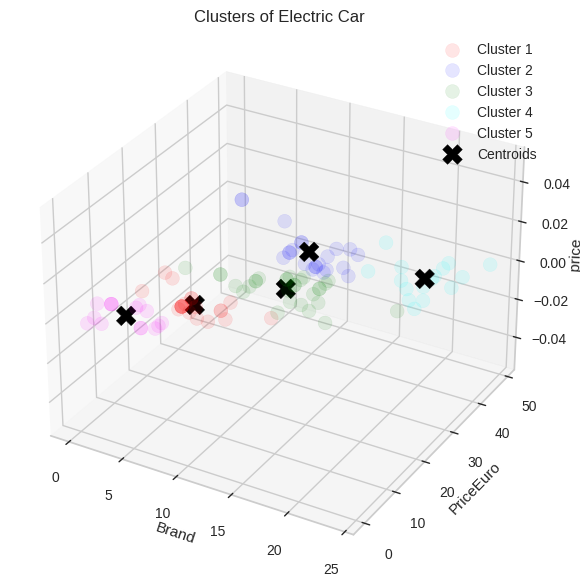

In [50]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1', alpha=0.1)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', alpha=0.1)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3', alpha=0.1)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', alpha=0.1)
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5', alpha=0.1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids', alpha=1, marker="X")
ax.set_zlabel('price')

plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('PriceEuro')
plt.legend()
plt.show()

For data2 using regression 

In [51]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['PriceIndian']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)
print(lm.intercept_) 

42.19417475728155


In [52]:
lm.coef_

array([-10.73770466,   1.16020289,  -1.19969786,  -3.33287238,
        -3.45799471,   3.26492918,   4.09524354,   8.47119464,
        18.15172279])

In [53]:
predictions=lm.predict(X_test)
predictions

array([43., 11., 59., 37., 29., 62., 24., 38., 46., 12., 14., 43.,  4.,
       85., 70., 36., 48., 23., 43., 86., 55., 64., 67.,  6., 83., 77.,
       82., 38., 53., 61., 29., 32., 20., 81., 17., 25., 33., 56.,  8.,
       19., 63., 30.])

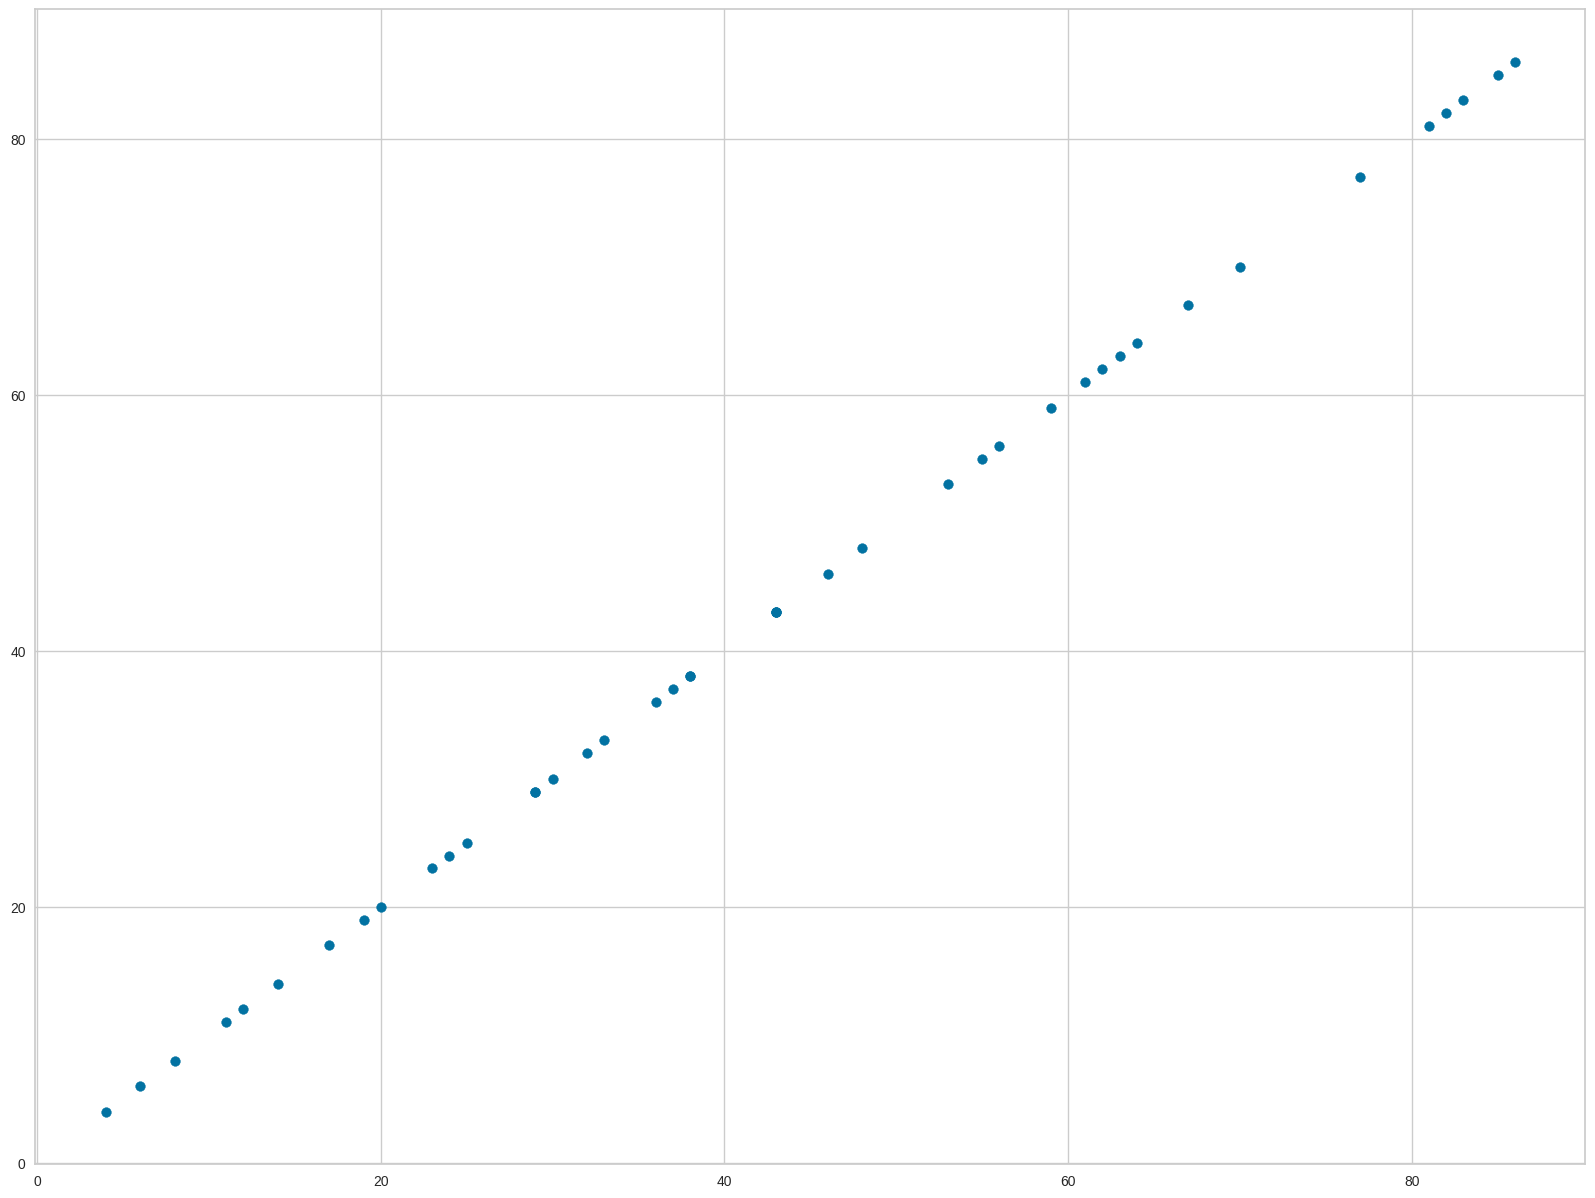

In [54]:
plt.scatter(y_test, predictions)

<ipython-input-55-4c283b31e3cd>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='PriceIndian', ylabel='Density'>

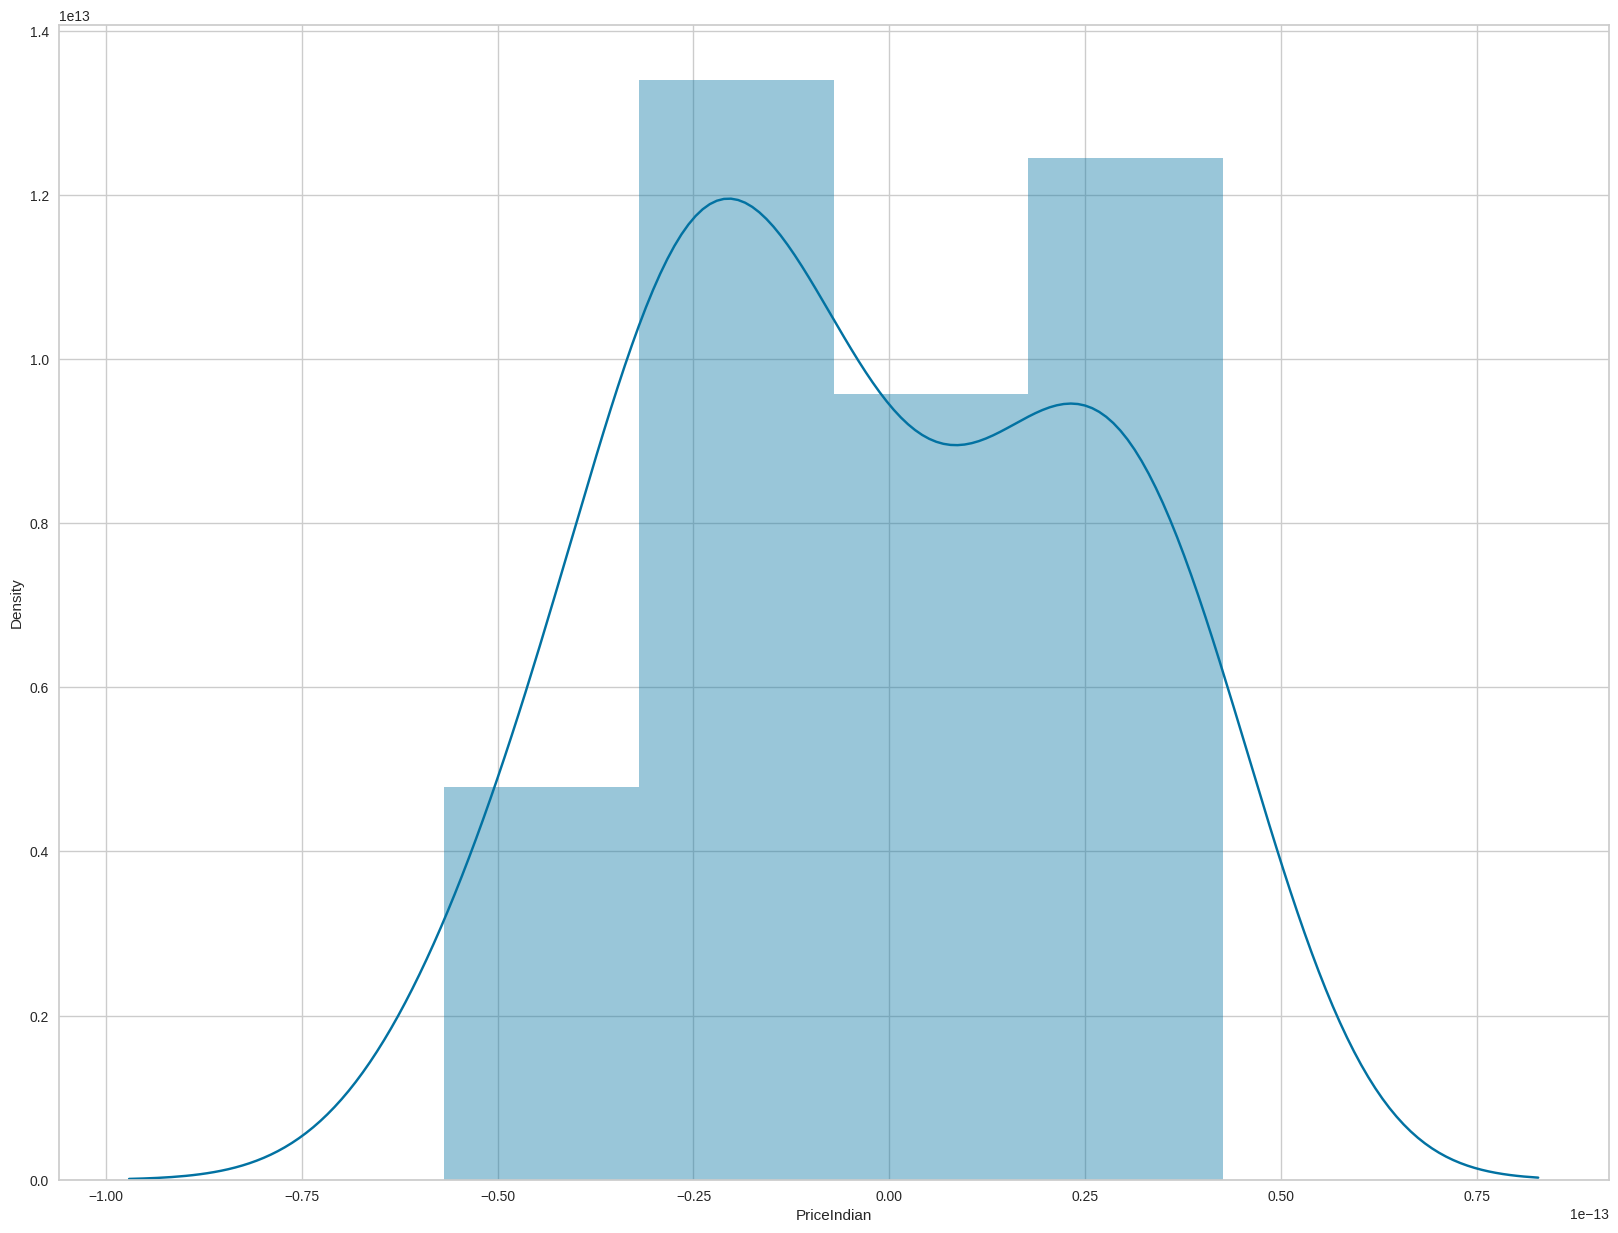

In [55]:
#Residual histogram plot
sns.distplot((y_test-predictions))

In [56]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.4615230488832043e-14
MSE: 7.942702371425273e-28
RMSE: 2.8182800377934895e-14
